In [1]:
import base64
import binascii
import string

from Crypto.Cipher import AES

from collections import Counter

from itertools import izip_longest

import numpy as np

In [2]:
goodchars = set(string.ascii_letters + string.digits + " .!?'\"")

def repkey(key, slen):
    return ((binascii.hexlify(key)) * (slen / len(key)+1))[:slen]

def sscore(s):
    return sum([c in goodchars for c in s])

def hamming(s1, s2):
    return sum(map(int, bin(int(challenge2(binascii.hexlify(s1), binascii.hexlify(s2)), 16))[2:]))

def grouper(iterable, n, fillvalue=None):
    args = [iter(iterable)] * n
    return izip_longest(*args, fillvalue=fillvalue)

def makebytes(x):
    return [''.join(cs) for cs in grouper(x, 2)]

def xor(s1, s2, conv=lambda x: hex(x)[2:].zfill(2), sconv=bytearray.fromhex):
    return ''.join([conv(x^y) for x, y in zip(sconv(s1), sconv(s2))])

def ecb_detect(msgs):
    for m in msgs:
        blocks = map(''.join, list(grouper(m, 16)))
        if Counter(blocks).most_common(1)[0][1] > 1:
            return [Counter(blocks), m]

In [105]:
class MT19937(object):
    (w, n, m, r) = (32, 624, 397, 31)
    a = 0x9908B0DF
    (u, d) = (11, 0xFFFFFFFF)
    (s, b) = (7, 0x9D2C5680)
    (t, c) = (15, 0xEFC60000)
    f = 1812433253
    l = 18
    
    def __init__(self, seed=0):
        self.MT = [0] * n
        self.index = self.n+1
        
        self.lower_mask = (1 << self.r) - 1
        self.upper_mask = (~self.lower_mask) & ((1 << w) - 1)
        
        self.seed(seed)
    
    def seed(self, seed):
        self.index = self.n
        self.MT[0] = seed
        for i in xrange(1, self.n):
            self.MT[i] = (self.f * (self.MT[i-1] ^ (self.MT[i-1] >> (self.w-2))) + i) & ((1 << self.w) - 1)
            
    def extract_number(self):
        if self.index >= n:
            if self.index > n:
                raise IndexError("Not seeded")
            self.twist()
        
        y = self.MT[self.index]
        y ^= ((y >> self.u) & self.d)
        y ^= ((y << self.s) & self.b)
        y ^= ((y << self.t) & self.c)
        y ^= y >> self.l
        
        self.index += 1
        return y  & ((1 << self.w) - 1)

    def twist(self):
        for i in xrange(self.n):
            x = (self.MT[i] & self.upper_mask) + (self.MT[(i+1) % self.n] & self.lower_mask)
            xA = x >> 1
            if (x % 2) != 0:
                xA ^= self.a
            self.MT[i] = self.MT[(i+self.m) % self.n] ^ xA
        self.index = 0

In [107]:
m = MT19937(1)
m.extract_number()

1791095845

In [108]:
l = [m.extract_number() for _ in xrange(100000)]
l[:5]

[4282876139, 3093770124, 4005303368, 491263, 550290313]

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt

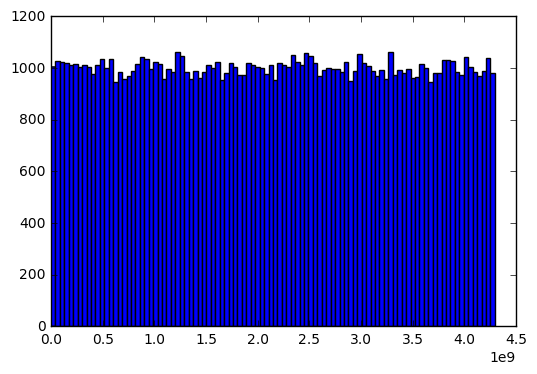

In [110]:
plt.hist(l, bins=100); 